In [9]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2
    
R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

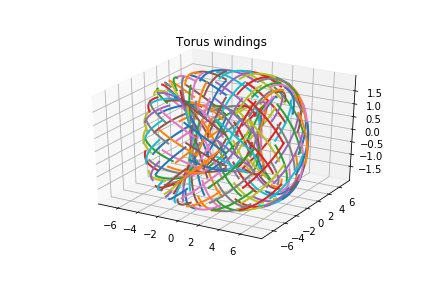

In [13]:
list_traj = []
N=15
length=41

for i in range(N):
    for j in range(N):
        list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=length-1))  

ax = plt.figure().add_subplot(projection='3d')
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Torus windings")
for i in range(len(list_traj)):
    ax.plot(*list_traj[i][:,1:].T, lw=2)
plt.show()

In [14]:
traj_list = list_traj
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, 0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 9)
#print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]

project = True

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = traj_list


Trajectory shape before embedding:
(40, 4)
Trajectory shape after embedding and projecting:
(40, 2)


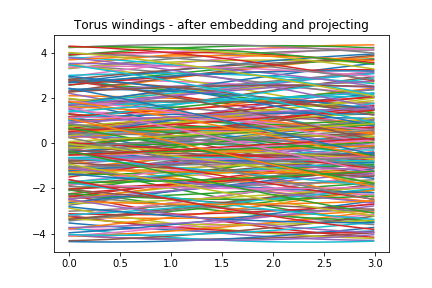

In [15]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()


In [16]:
t2s = Traj2Sim()

load=False

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hdto1d.npy')

|███████                                 | ▂▂▄ 4392/25200 [17%] in 7:48 (9. 7/25200 [0%] in 1s (9.9/s, e14/25200 [0%] in 1s (11.3/s,in 1s (11.9/s,▆▄▂ 18/25200 [0%] in 2s (11.3/s,▄▂▂ 22/25200 [0%] in 2s (11.3/s, in 3s (11.5/s, ▃▅▇ 32/25200 [0%] in 3s (11.6/s, █▆▄ 41/25200 [0%] in 3s (11.8/s,48/25200 [0%] in 4s (11.7/s, in 4s (11.7/s, (13.0/(13.0/ 227/25200 [1%] in 17s (13.0/ in 19s (13.0/(13.0/ ▅▇▇ 318/25200 [1%] in 24s (13.1/ ▄▂▂ 333/25200 [1%] in 25s (13.2/ ▃▁▃ 365/25200 [1%] in 28s (13.2/374/25200 [1%] in 28s (13.2/ (13.2/ in 31s (13.2/(13.3/in 35s (13.3/ ▃▅▇ 469/25200 [2%] in 35s (13.3/in 36s (13.3/485/25200 [2%] in 36s (13.3/ in 38s (13.3/510/25200 [2%] in 39s (13.2/ 511/25200 [2%] in 39s (13.2/▅▇▇ 525/25200 [2%] in 40s (13.1/█▆▄ 543/25200 [2%] in 42s (12.9/in 44s (12.7/ ▂▄▆ 601/25200 [2%] in 49s (12.3/▄▂▂ 612/25200 [2%] in 50s (12.2/ in 52s (12.1/ 641/25200 [3%] in 53s (12.0/▇▅▃ 643/25200 [3%] in 54s (12.0/(11.9/█▆▄ 657/25200 [3%] in 55s (11.9/ ▂▄▆ 683/25200 [3%] in 58s (11.7/in 5

|██████████████▎                         | ▃▅▇ 8980/25200 [36%] in 16:13 (9 (9. ▇▇▅ 4403/25200 [17%] in 7:49 (9. █▆▄ 4424/25200 [18%] in 7:51 (9.in 7:58 (9. in 7:59 (9. in 8:01 (9.▃▁▃ 4538/25200 [18%] in 8:03 (9. ▂▂▄ 4540/25200 [18%] in 8:03 (9. ▆█▆ 4547/25200 [18%] in 8:04 (9.4569/25200 [18%] in 8:07 (9. 4630/25200 [18%] in 8:13 (9.in 8:14 (9.▃▅▇ 4646/25200 [18%] in 8:15 (9. ▁▃▅ 4661/25200 [18%] in 8:17 (9.▂▄▆ 4679/25200 [19%] in 8:19 (9.in 8:19 (9.▃▁▃ 4695/25200 [19%] in 8:20 (9. in 8:21 (9. in 8:23 (9. ▇▅▃ 4739/25200 [19%] in 8:25 (9.in 8:26 (9. 4751/25200 [19%] in 8:26 (9. ▇▇▅ 4756/25200 [19%] in 8:27 (9.4779/25200 [19%] in 8:30 (9.in 8:33 (9. ▆▄▂ 4816/25200 [19%] in 8:34 (9. (9. ▂▄▆ 4823/25200 [19%] in 8:34 (9. (9.in 8:37 (9. ▇▅▃ 4881/25200 [19%] in 8:41 (9.4886/25200 [19%] in 8:41 (9.▃▁▃ 4900/25200 [19%] in 8:43 (9. (9. in 8:46 (9. ▃▅▇ 4958/25200 [20%] in 8:49 (9. (9.█▆▄ 4965/25200 [20%] in 8:50 (9. (9.(9. (9. 5005/25200 [20%] in 8:54 (9.▂▂▄ 5011/25200 [20%] in 8:55 (9. 5025/2520

|█████████████████████                   | █▆▄ 13228/25200 [52%] in 24:30 (▇▇▅ 8985/25200 [36%] in 16:14 (9 in 16:18 (9 in 16:21 (9 9052/25200 [36%] in 16:21 (9▅▃▁ 9062/25200 [36%] in 16:23 (9 in 16:25 (9 ▂▄▆ 9087/25200 [36%] in 16:25 (9 in 16:27 (9 in 16:28 (9 ▇▅▃ 9131/25200 [36%] in 16:30 (9▅▃▁ 9134/25200 [36%] in 16:30 (9 in 16:31 (9 ▇▅▃ 9164/25200 [36%] in 16:34 (9 ▂▂▄ 9184/25200 [36%] in 16:36 (9 9210/25200 [37%] in 16:39 (9▆▄▂ 9218/25200 [37%] in 16:39 (99221/25200 [37%] in 16:40 (9 ▆█▆ 9230/25200 [37%] in 16:41 (9 ▅▃▁ 9238/25200 [37%] in 16:42 (9(99284/25200 [37%] in 16:46 (9 ▇▇▅ 9289/25200 [37%] in 16:47 (9 in 16:51 (9 in 16:58 (9 in 16:59 (9 9417/25200 [37%] in 17:01 (9 ▃▅▇ 9425/25200 [37%] in 17:02 (9 (9 in 17:04 (99467/25200 [38%] in 17:06 (9 in 17:07 (9 ▆█▆ 9483/25200 [38%] in 17:08 (9 9495/25200 [38%] in 17:09 (9▇▅▃ 9503/25200 [38%] in 17:10 (9 ▄▂▂ 9507/25200 [38%] in 17:11 (9 9508/25200 [38%] in 17:11 (9in 17:19 (9in 17:20 (9█▆▄ 9594/25200 [38%] in 17:20 (9 9601/25200 [38

|███████████████████████████▉            | ▂▂▄ 17548/25200 [70%] in 32:49 (▆▄▂ 13248/25200 [53%] in 24:33 ( ▇▇▅ 13277/25200 [53%] in 24:36 (in 24:37 ( ▁▃▅ 13290/25200 [53%] in 24:37 ( 13301/25200 [53%] in 24:38 ( 13303/25200 [53%] in 24:38 ( in 24:39 (in 24:39 (13335/25200 [53%] in 24:42 (13338/25200 [53%] in 24:42 ( ▆▄▂ 13340/25200 [53%] in 24:42 (13346/25200 [53%] in 24:43 (▇▇▅ 13352/25200 [53%] in 24:44 ( in 24:44 (( ▁▃▅ 13363/25200 [53%] in 24:45 ( 13370/25200 [53%] in 24:46 (13375/25200 [53%] in 24:46 (▇▅▃ 13377/25200 [53%] in 24:46 ( ( in 24:53 (in 24:55 ( ▁▃▅ 13456/25200 [53%] in 24:55 ( 13483/25200 [54%] in 24:58 (in 24:59 (13499/25200 [54%] in 24:59 ( 13504/25200 [54%] in 25:00 ( in 25:04 (▇▅▃ 13542/25200 [54%] in 25:04 (▅▇▇ 13554/25200 [54%] in 25:05 ( in 25:06 ( 13578/25200 [54%] in 25:08 (in 25:09 ( ▅▇▇ 13609/25200 [54%] in 25:11 ( ( in 25:14 (( ▄▆█ 13645/25200 [54%] in 25:16 ( ( 13659/25200 [54%] in 25:17 ( 13663/25200 [54%] in 25:18 (in 25:19 ( ▁▃▅ 13695/25200 [54%] in 25

|██████████████████████████████████▎     | ▄▆█ 21608/25200 [86%] in 40:09 ( ▅▇▇ 17555/25200 [70%] in 32:49 ( (▆▄▂ 17582/25200 [70%] in 32:52 (▄▂▂ 17587/25200 [70%] in 32:53 (17593/25200 [70%] in 32:54 (▄▆█ 17596/25200 [70%] in 32:54 (▆▄▂ 17603/25200 [70%] in 32:55 ( ▇▇▅ 17618/25200 [70%] in 32:56 ( ((in 33:02 ( ▄▆█ 17691/25200 [70%] in 33:04 ((▅▃▁ 17724/25200 [70%] in 33:07 ( in 33:07 ( ▄▆█ 17733/25200 [70%] in 33:08 (▇▅▃ 17740/25200 [70%] in 33:09 ( in 33:12 (in 33:12 ( in 33:13 ( ▄▂▂ 17778/25200 [71%] in 33:13 ( ▄▆█ 17803/25200 [71%] in 33:16 (17814/25200 [71%] in 33:17 (▆▄▂ 17828/25200 [71%] in 33:19 ( 17848/25200 [71%] in 33:22 (▂▂▄ 17902/25200 [71%] in 33:27 (▇▇▅ 17912/25200 [71%] in 33:28 ( 17924/25200 [71%] in 33:30 ( ▃▅▇ 17928/25200 [71%] in 33:30 ( in 33:32 ( (in 33:34 ( ▇▅▃ 17966/25200 [71%] in 33:34 (( ▄▆█ 17982/25200 [71%] in 33:36 ( 17989/25200 [71%] in 33:37 ( 17995/25200 [71%] in 33:37 ( 18010/25200 [71%] in 33:39 (18013/25200 [71%] in 33:39 (( ▆▄▂ 18033/25200 [72%] in 3

|████████████████████████████████████████| 25200/25200 [100%] in 46:36.5 (9 (in 40:12 ( ▄▆█ 21642/25200 [86%] in 40:13 ( ▇▅▃ 21648/25200 [86%] in 40:13 ( ▄▂▂ 21674/25200 [86%] in 40:16 ( ▃▁▃ 21697/25200 [86%] in 40:18 (21733/25200 [86%] in 40:22 ( 21737/25200 [86%] in 40:22 ( ▄▆█ 21744/25200 [86%] in 40:23 ( (▆▄▂ 21770/25200 [86%] in 40:26 (21786/25200 [86%] in 40:28 ( ▂▂▄ 21793/25200 [86%] in 40:29 ((▂▄▆ 21831/25200 [87%] in 40:33 (▇▇▅ 21836/25200 [87%] in 40:33 ((▂▂▄ 21846/25200 [87%] in 40:35 ( ▄▂▂ 21860/25200 [87%] in 40:36 ( 21883/25200 [87%] in 40:39 ( ( in 40:40 ( in 40:44 ( 21928/25200 [87%] in 40:44 (▇▅▃ 21939/25200 [87%] in 40:45 (▃▅▇ 21950/25200 [87%] in 40:46 ((21984/25200 [87%] in 40:50 (( ▅▇▇ 22011/25200 [87%] in 40:53 ( 22050/25200 [88%] in 40:57 (in 41:01 ( ( 22092/25200 [88%] in 41:02 ( ▇▇▅ 22148/25200 [88%] in 41:08 (▇▅▃ 22152/25200 [88%] in 41:08 ( 22161/25200 [88%] in 41:09 ( in 41:09 (▅▇▇ 22166/25200 [88%] in 41:10 (▆█▆ 22167/25200 [88%] in 41:10 (▃▁▃ 22175/25200 [

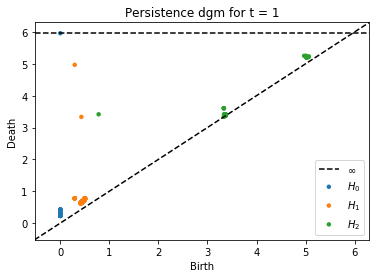

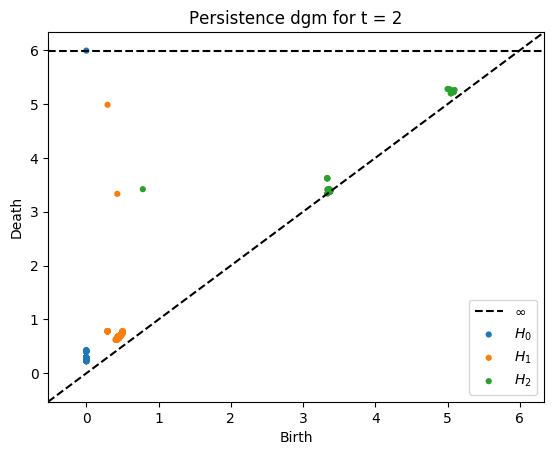

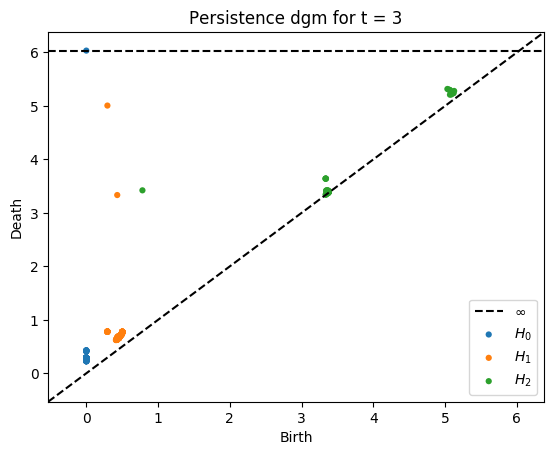

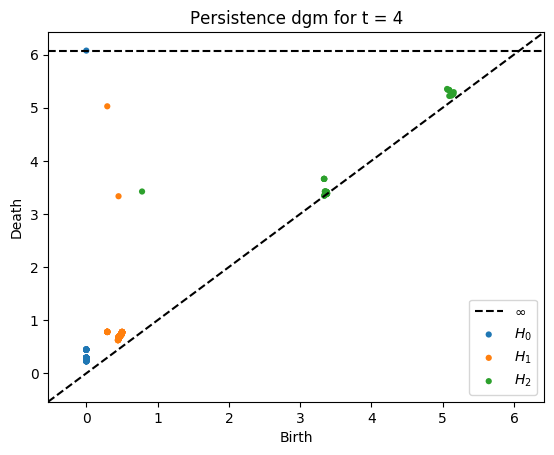

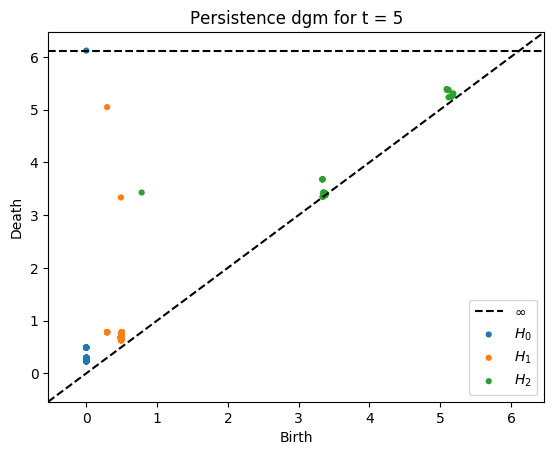

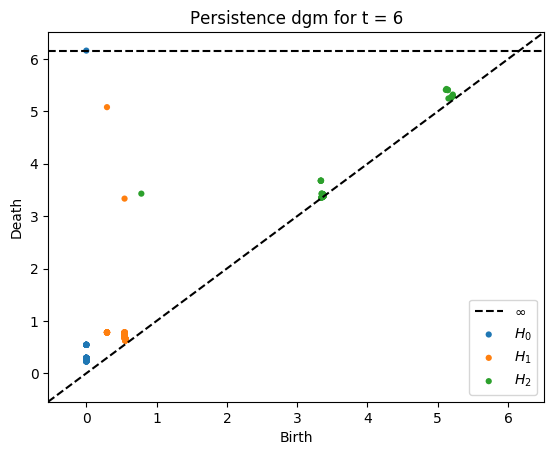

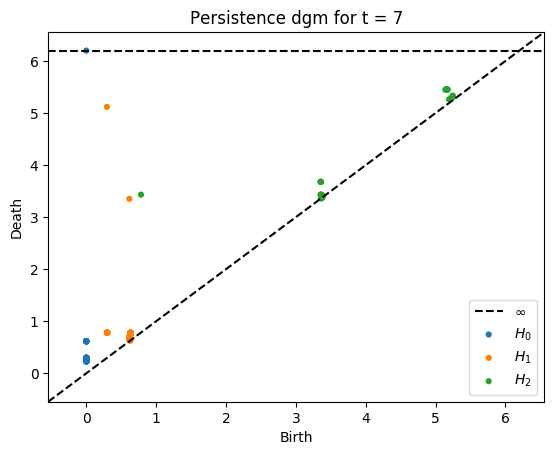

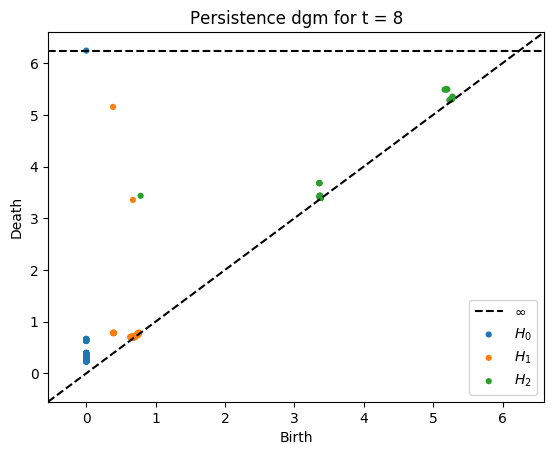

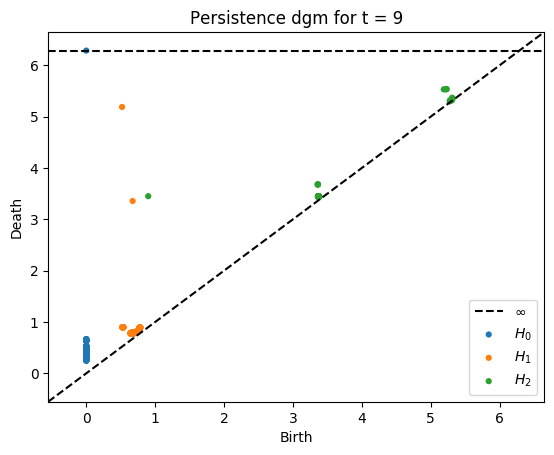

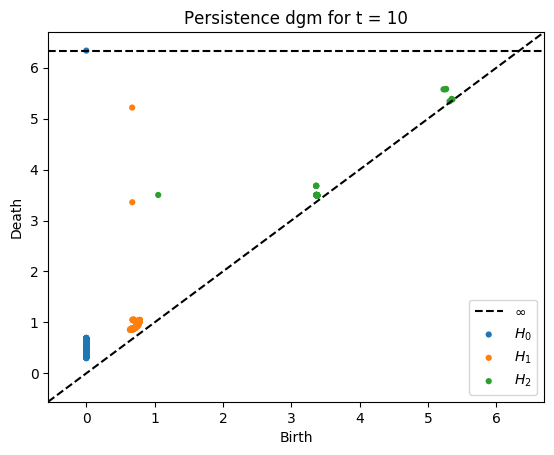

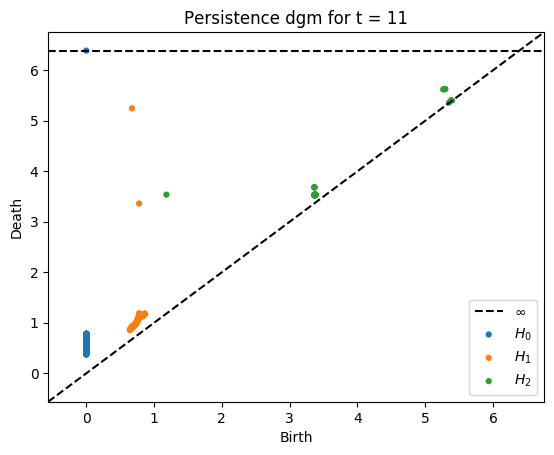

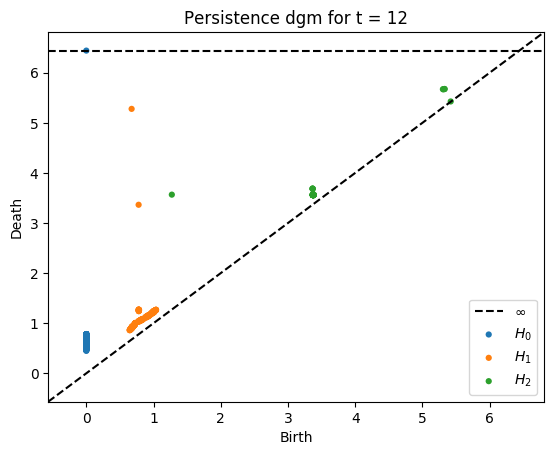

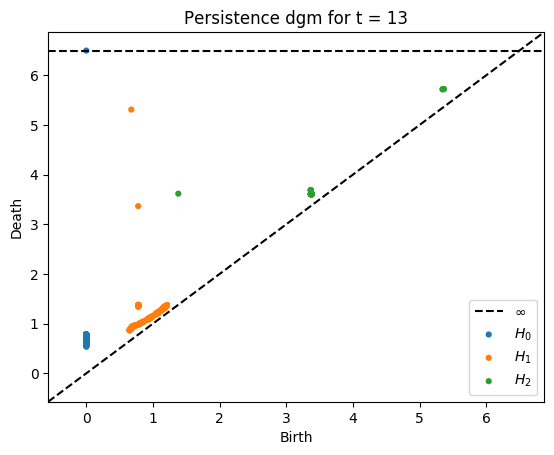

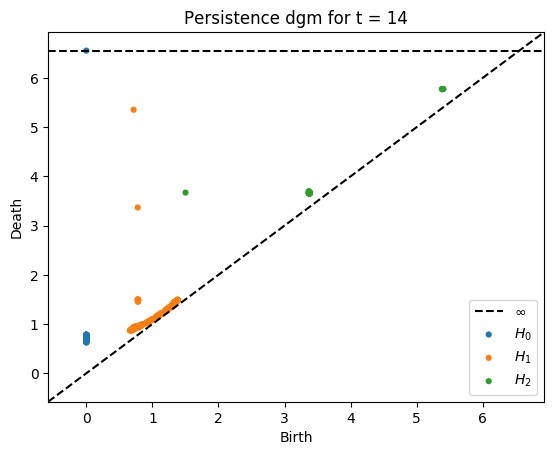

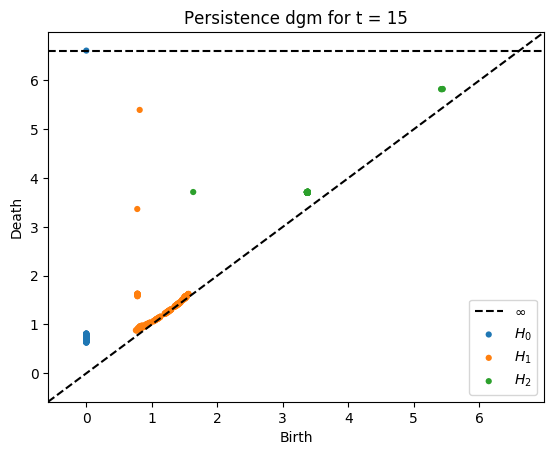

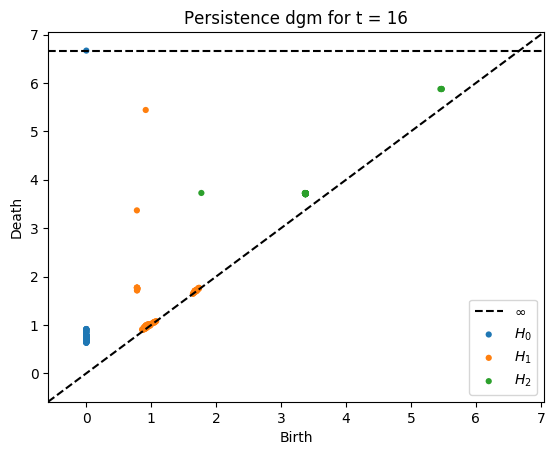

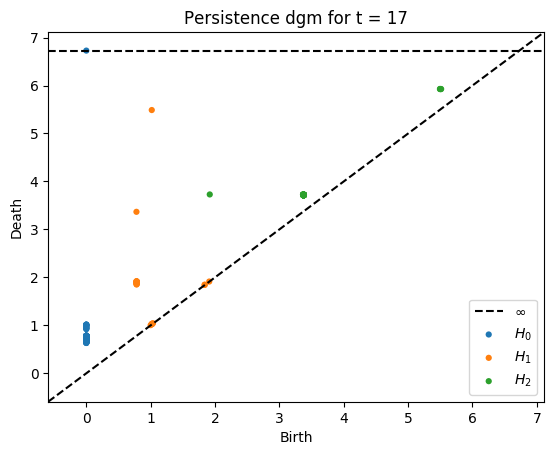

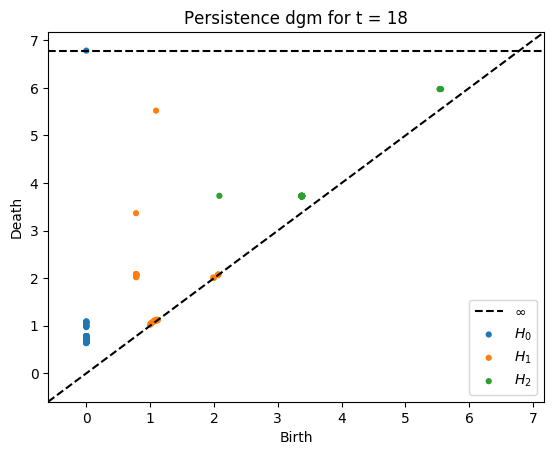

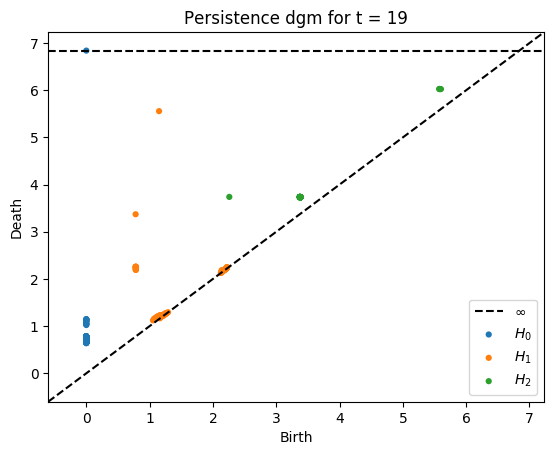

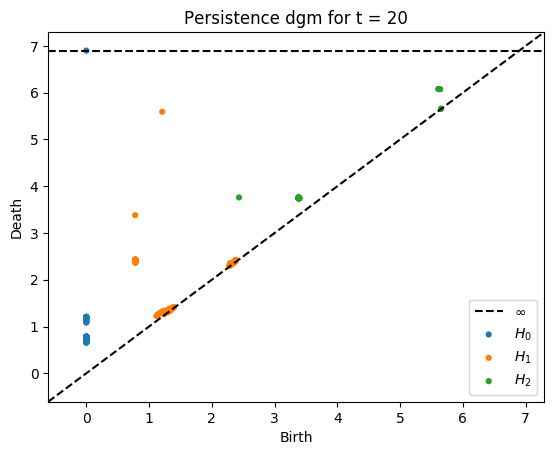

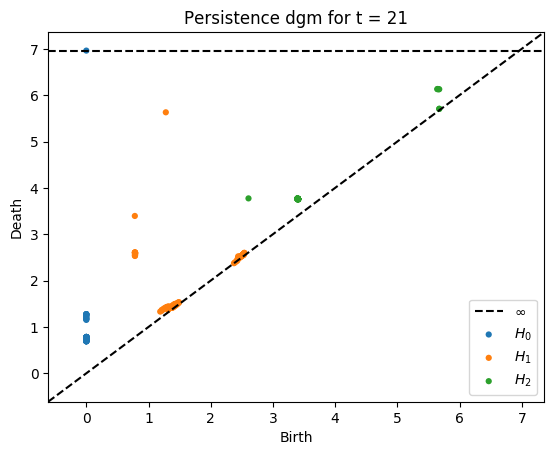

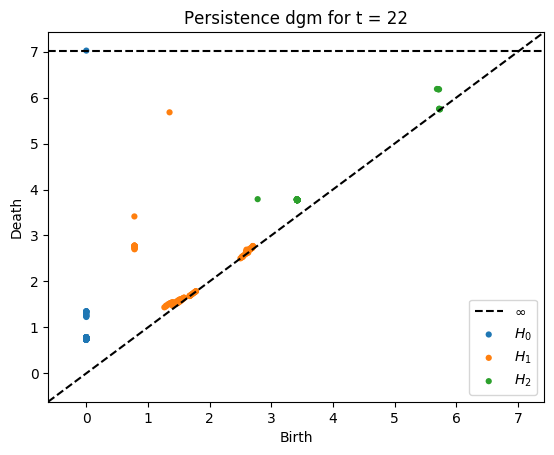

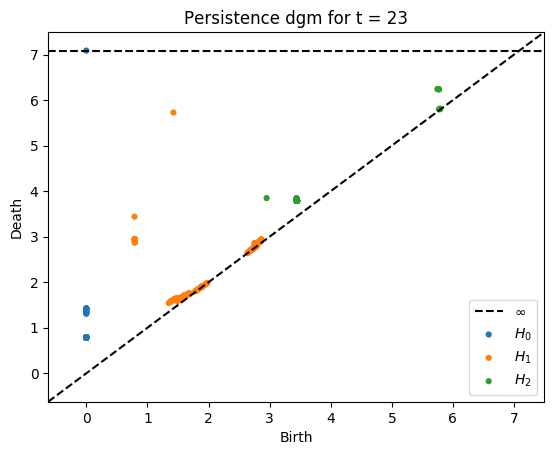

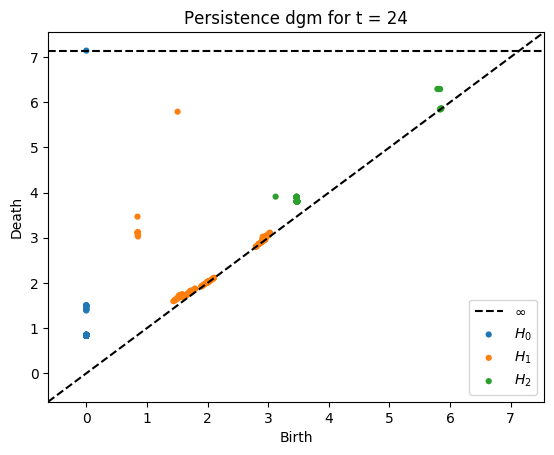

In [6]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

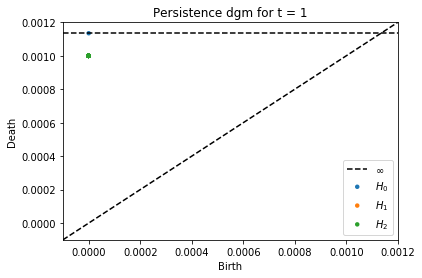

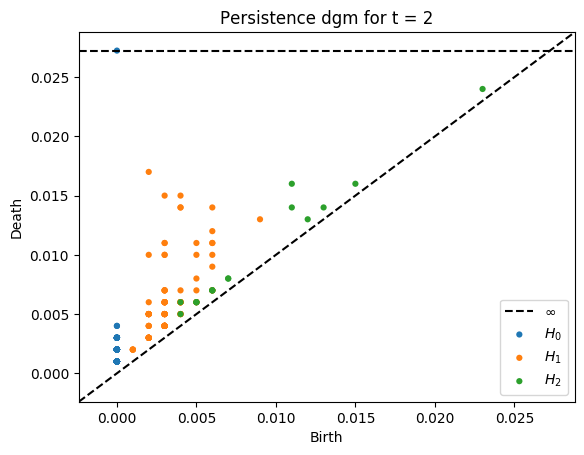

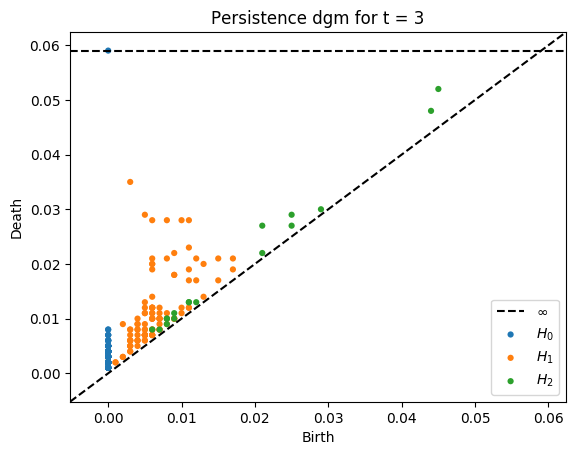

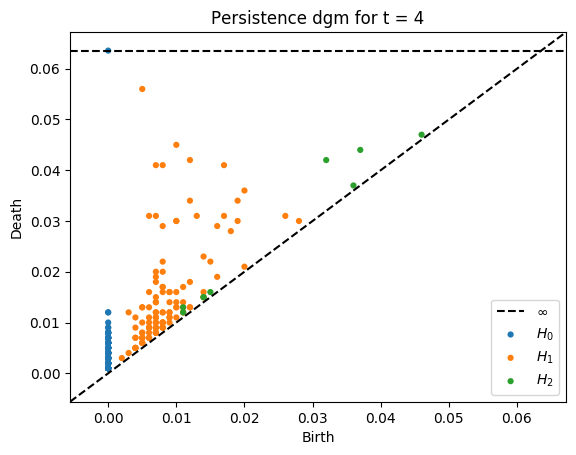

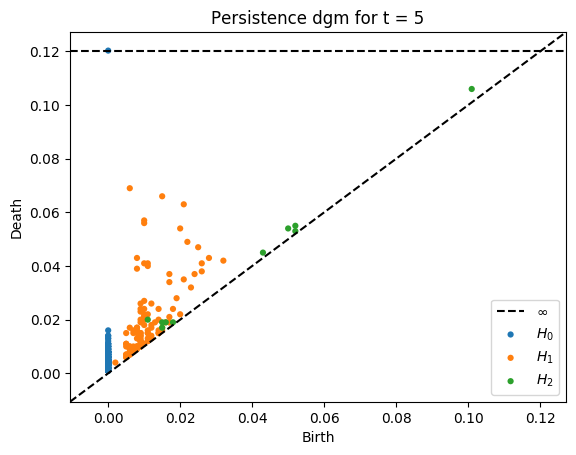

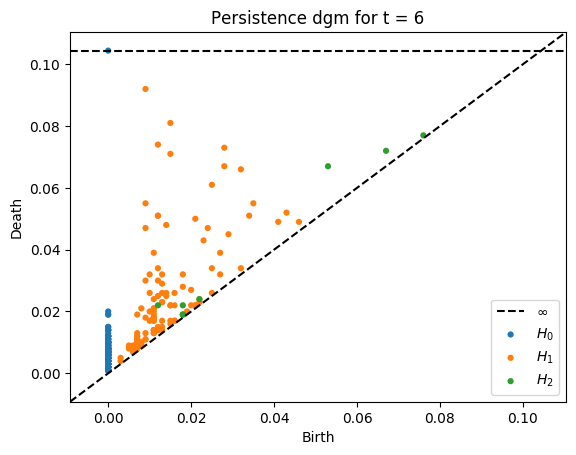

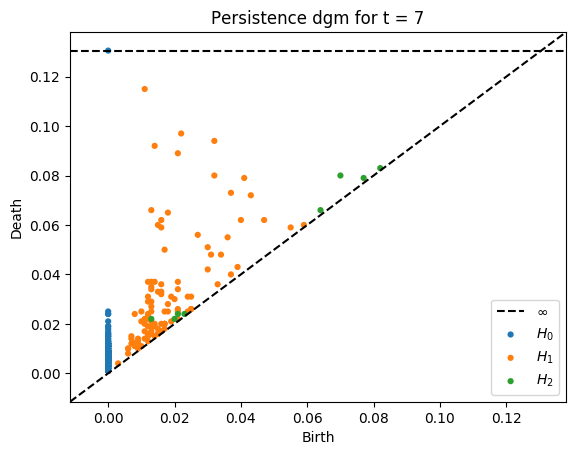

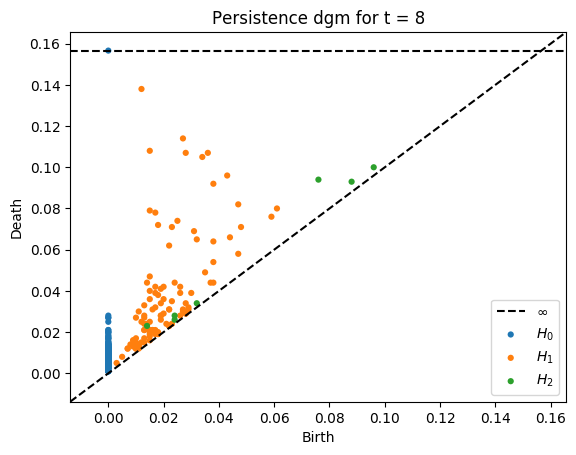

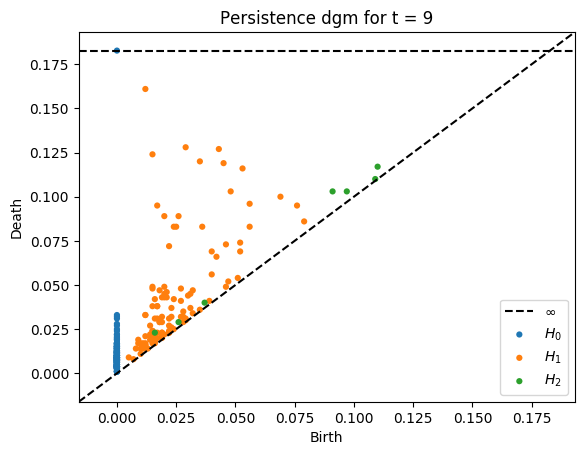

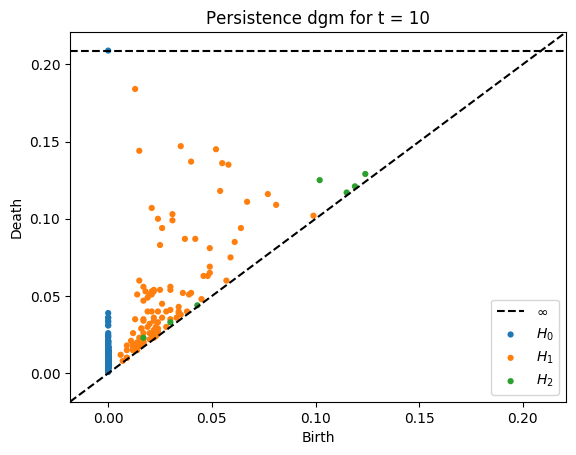

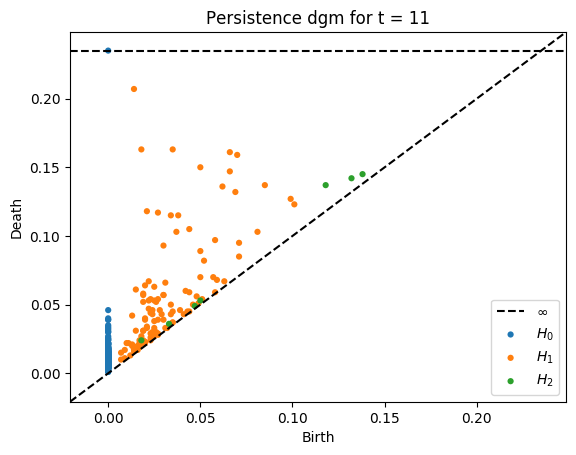

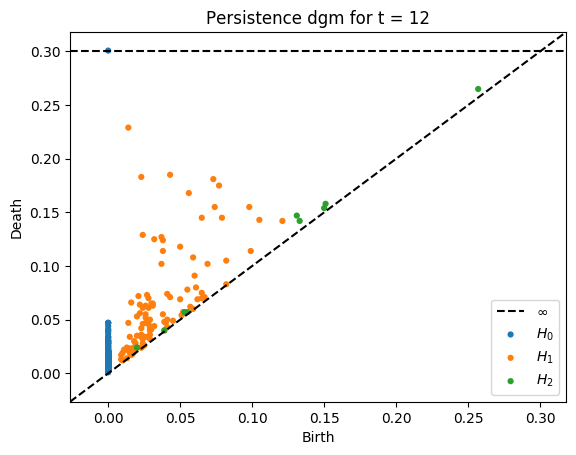

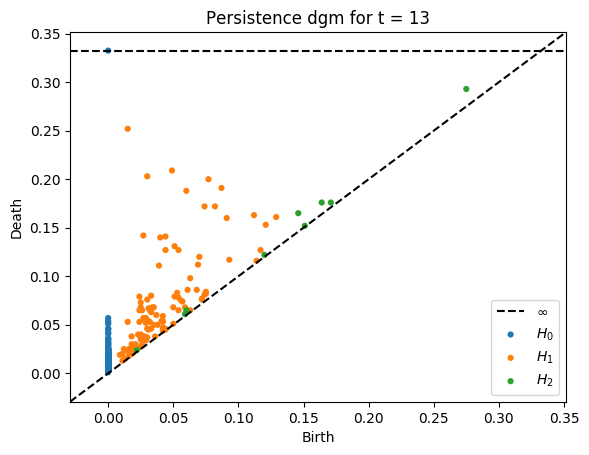

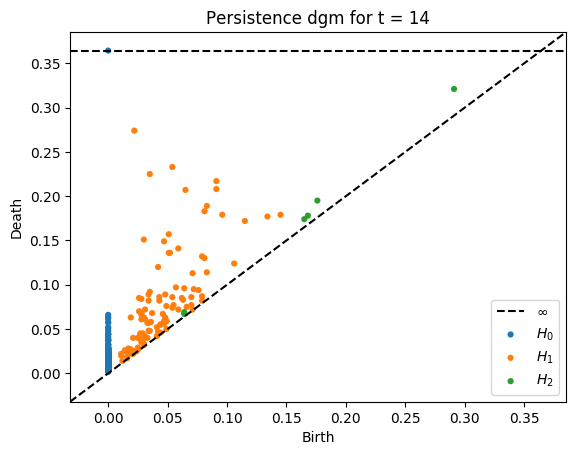

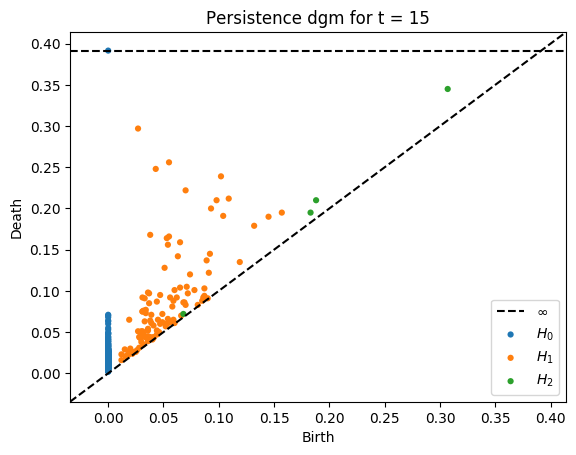

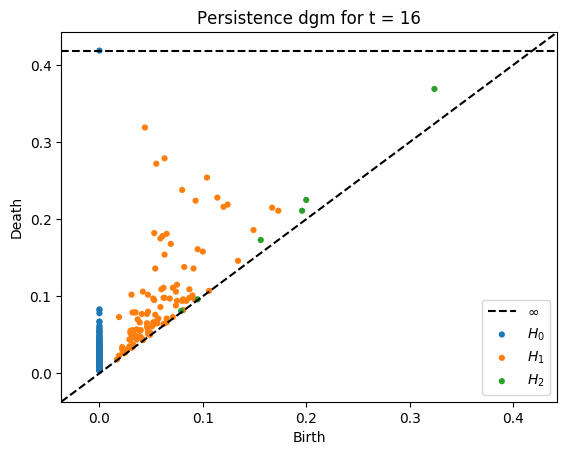

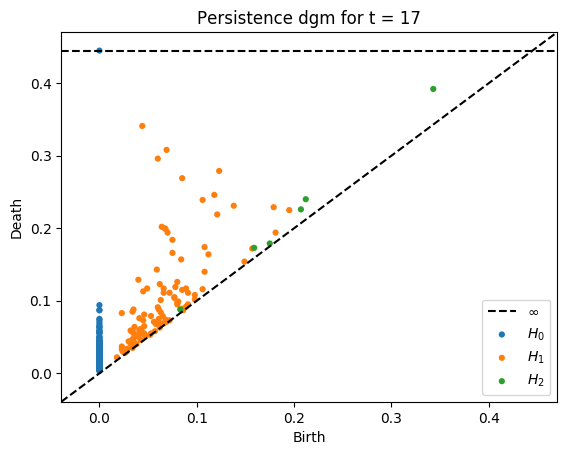

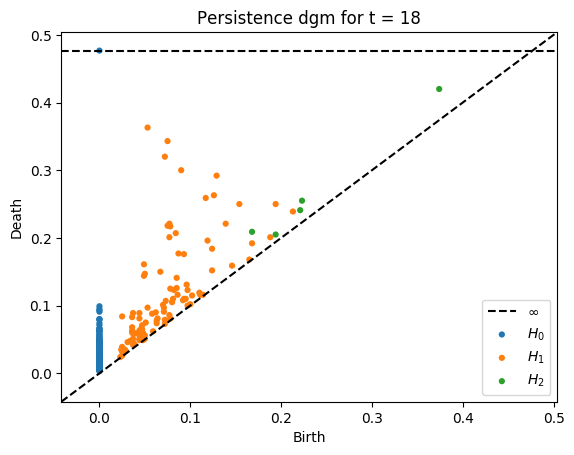

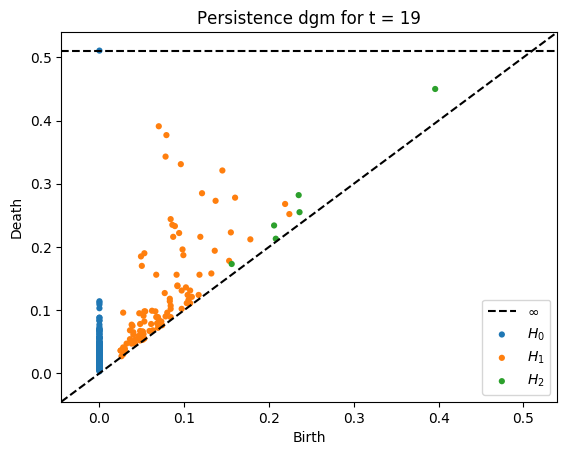

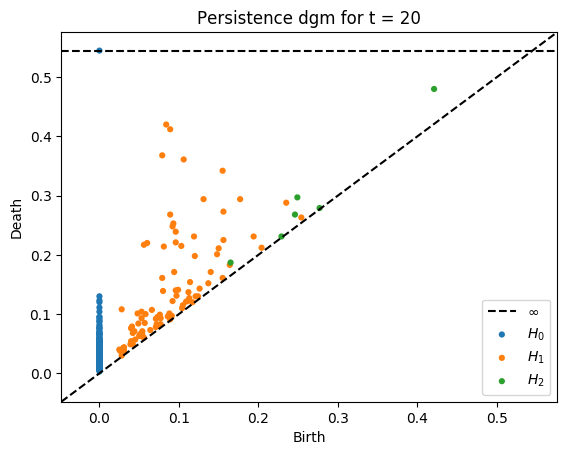

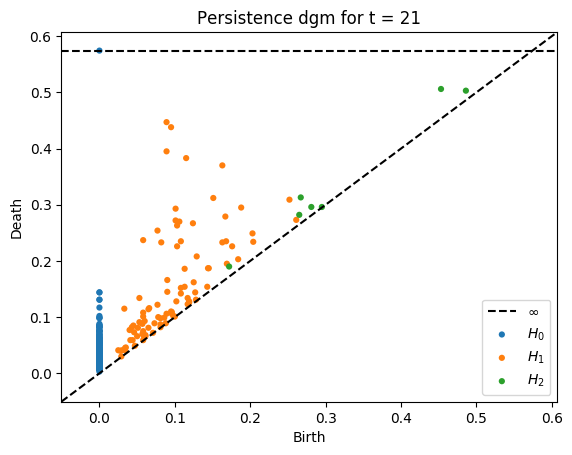

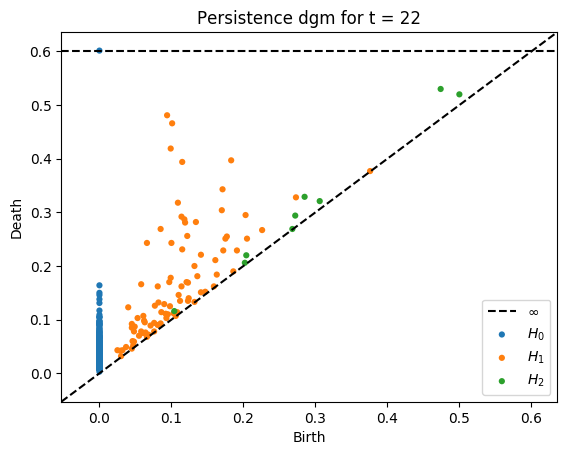

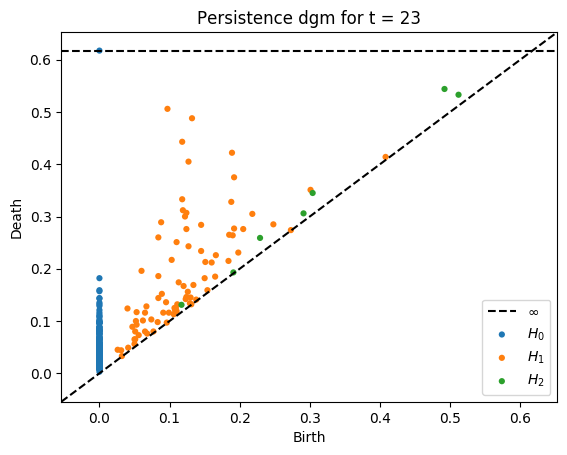

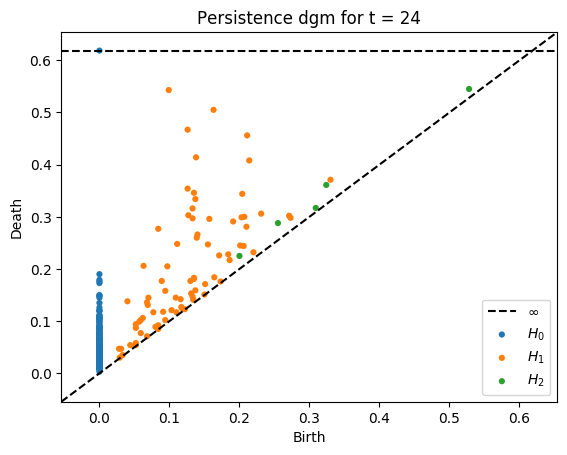

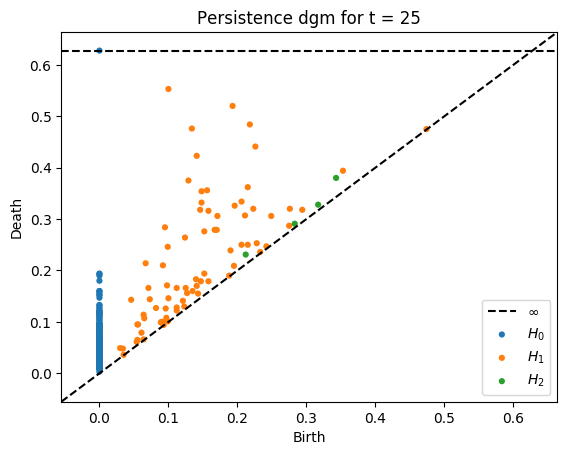

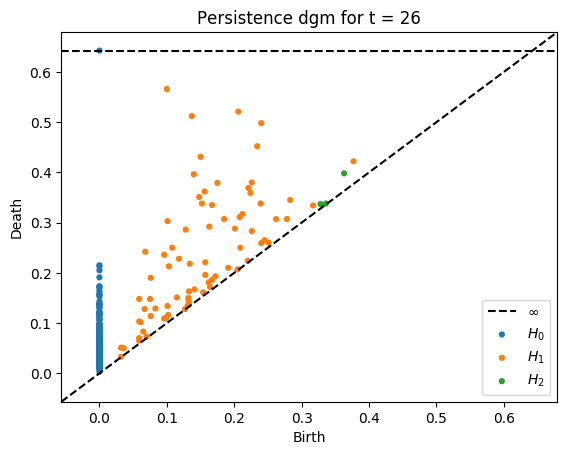

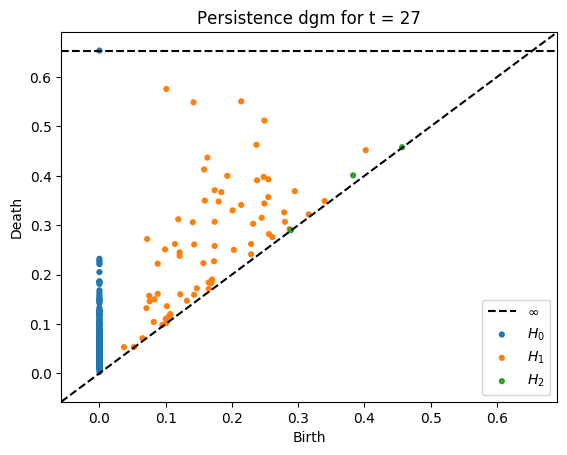

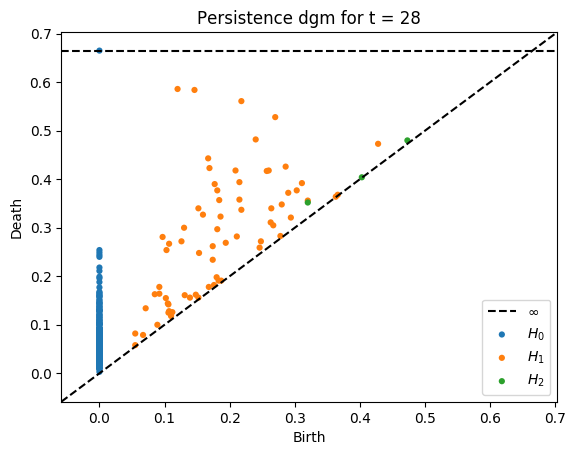

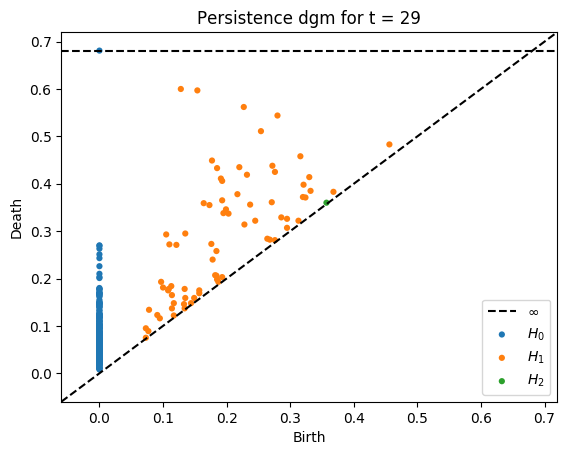

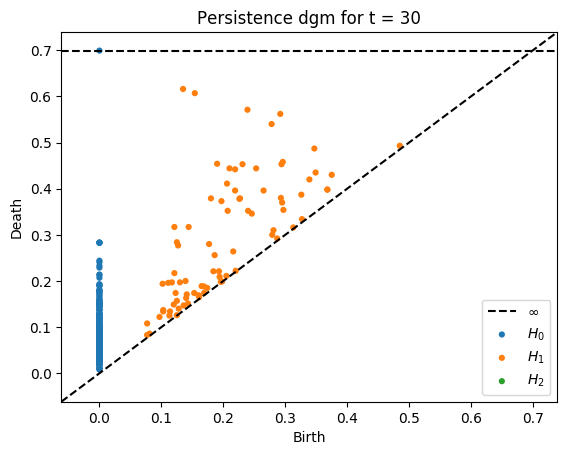

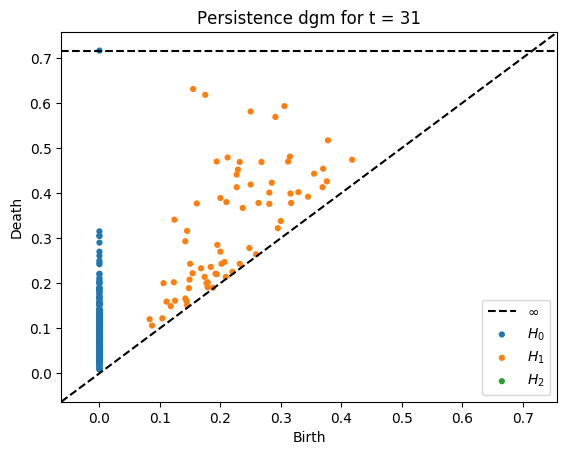

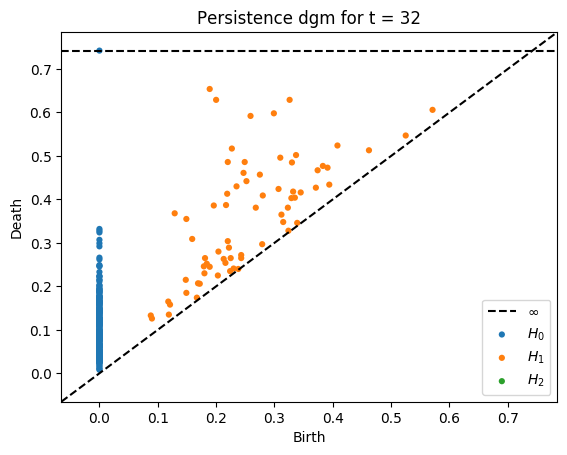

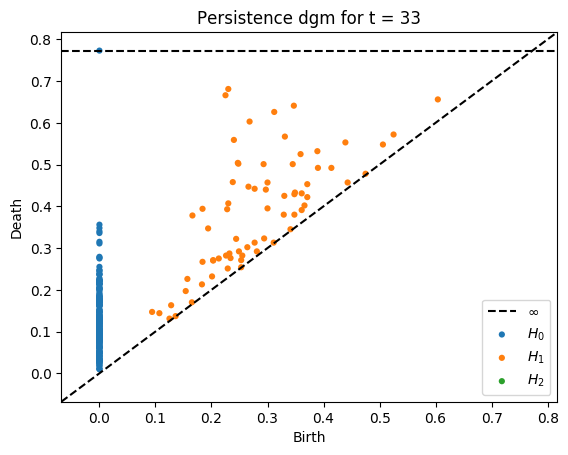

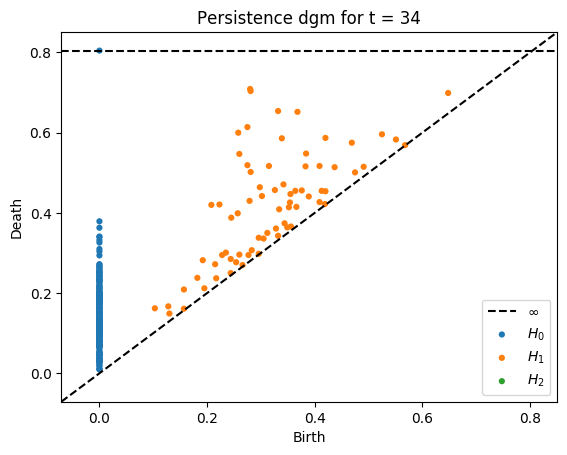

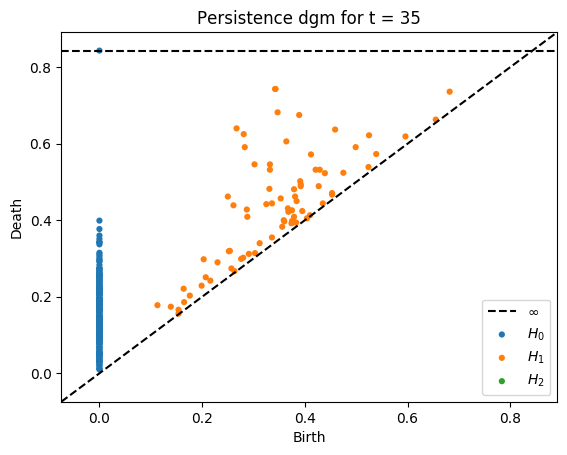

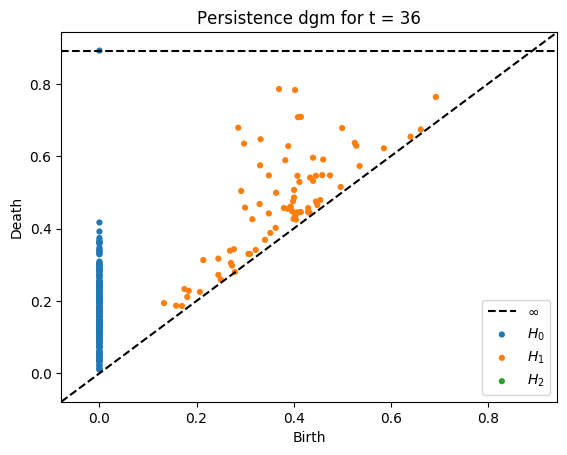

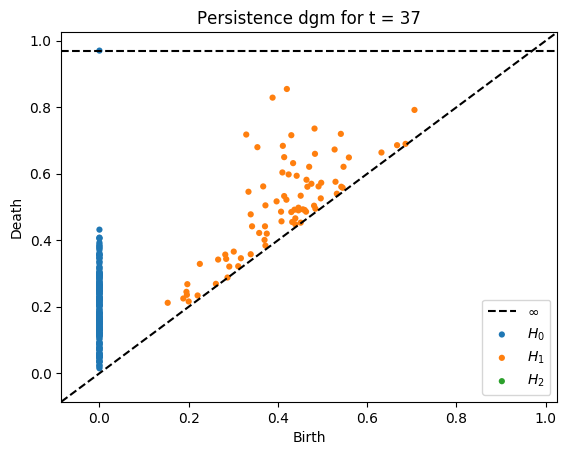

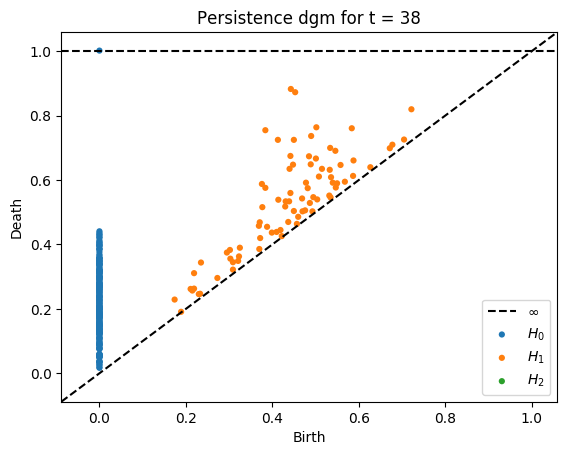

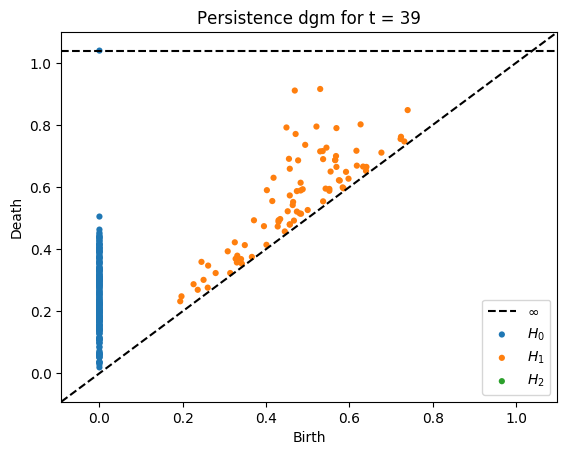

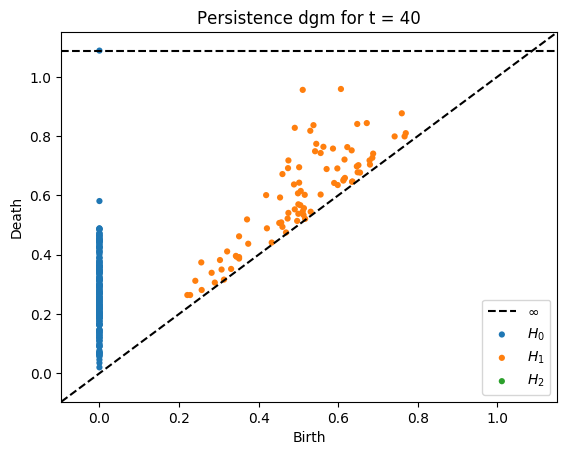

In [17]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)